In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
# Set the path to your dataset
train_path = './chest_xray/train'
test_path = './chest_xray/test'
validation_path = './chest_xray/val'

In [3]:
# Image dimensions
img_width, img_height = 150, 150


In [4]:

# Create a data generator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

training_set = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.


In [5]:
# Create a data generator for test set
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)


Found 624 images belonging to 2 classes.


In [6]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [8]:
# Train the model
history = model.fit(
    training_set,
    epochs=5,
    validation_data=test_set
)


Epoch 1/5
163/163 [==============================] - 310s 2s/step - loss: 0.7177 - accuracy: 0.8317 - val_loss: 0.6704 - val_accuracy: 0.7548
Epoch 2/5
163/163 [==============================] - 236s 1s/step - loss: 0.2030 - accuracy: 0.9212 - val_loss: 0.4478 - val_accuracy: 0.8510
Epoch 3/5
163/163 [==============================] - 248s 2s/step - loss: 0.1841 - accuracy: 0.9304 - val_loss: 0.6788 - val_accuracy: 0.8029
Epoch 4/5
163/163 [==============================] - 282s 2s/step - loss: 0.1682 - accuracy: 0.9323 - val_loss: 0.5152 - val_accuracy: 0.8173
Epoch 5/5
163/163 [==============================] - 254s 2s/step - loss: 0.1696 - accuracy: 0.9331 - val_loss: 0.6646 - val_accuracy: 0.8205


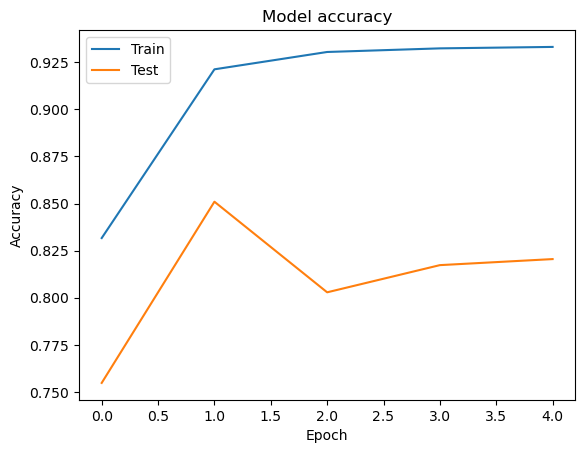

In [9]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [11]:
import pickle

In [12]:
import pickle

# Assuming 'model' is your trained deep learning model object
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)


INFO:tensorflow:Assets written to: ram://2407c7b3-8c3f-4cca-a3a0-7a426ba7340f/assets


INFO:tensorflow:Assets written to: ram://2407c7b3-8c3f-4cca-a3a0-7a426ba7340f/assets


In [13]:
# Save the model
model.save('model.h5')

# Load the model
loaded_model = tf.keras.models.load_model('model.h5')

# Evaluate the loaded model on the test set
loaded_model.evaluate(test_set)


20/20 [==============================] - 13s 634ms/step - loss: 0.6646 - accuracy: 0.8205


[0.6646400690078735, 0.8205128312110901]

In [16]:
#import tensorflow as tf

# Load the saved model
loaded_model = tf.keras.models.load_model('model.h5')

# Create a data generator for the validation set
validation_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

validation_set = validation_datagen.flow_from_directory(
    validation_path,
    target_size=(img_width, img_height),
    batch_size=32,  # Assuming you have defined batch_size earlier
    class_mode='binary'
)

# Evaluate the loaded model on the validation set
validation_loss, validation_accuracy = loaded_model.evaluate(validation_set)

print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)


Found 16 images belonging to 2 classes.
1/1 [==============================] - 1s 599ms/step - loss: 0.6917 - accuracy: 0.6875
Validation Loss: 0.6917203068733215
Validation Accuracy: 0.6875
